# 랭체인(LangChain) SelfQueryRetriever 예제
## 작성자 : AISchool ( http://aischool.ai/%ec%98%a8%eb%9d%bc%ec%9d%b8-%ea%b0%95%ec%9d%98-%ec%b9%b4%ed%85%8c%ea%b3%a0%eb%a6%ac/ )
## Reference : https://python.langchain.com/docs/modules/data_connection/retrievers/self_query

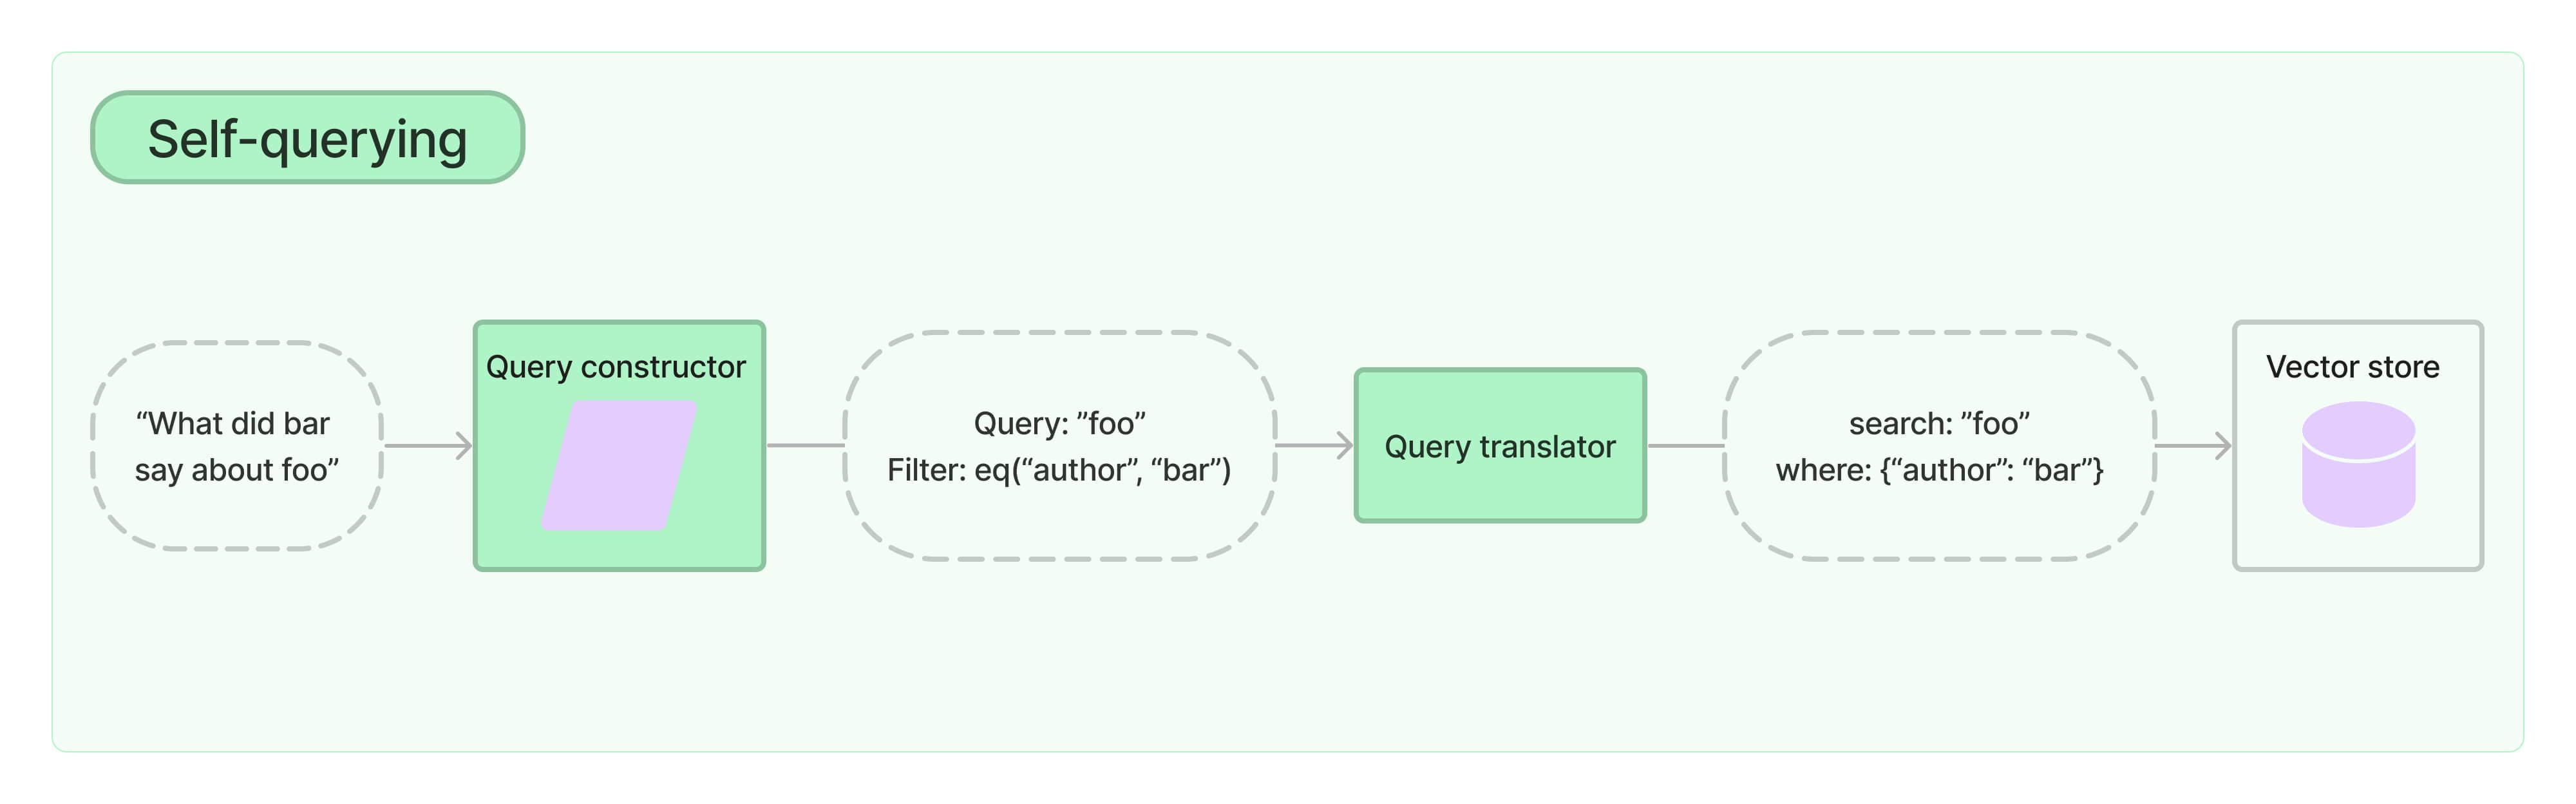

### SelfQueryRetriever를 이용하면 metadata에 대한 필터링을 손쉽게 진행할 수 있습니다.

# LangChain 라이브러리 설치

In [ ]:
!pip install --upgrade --quiet  langchain langchain-community langchain-openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.5/810.5 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.6/271.6 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.6/86.6 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 262.9/262.9 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.6 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade --quiet  lark chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.7/111.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 525.5/525.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 7.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproj

# OpenAI API Key 설정

In [ ]:
OPENAI_KEY = "여러분의_OPENAI_API_KEY"

# 필터링을 위한 데이터 구성

In [ ]:
from langchain_community.vectorstores import Chroma
from langchain_core.documents import Document
from langchain_openai import OpenAIEmbeddings

docs = [
    Document(
        page_content="A bunch of scientists bring back dinosaurs and mayhem breaks loose",
        metadata={"year": 1993, "rating": 7.7, "genre": "science fiction"},
    ),
    Document(
        page_content="Leo DiCaprio gets lost in a dream within a dream within a dream within a ...",
        metadata={"year": 2010, "director": "Christopher Nolan", "rating": 8.2},
    ),
    Document(
        page_content="A psychologist / detective gets lost in a series of dreams within dreams within dreams and Inception reused the idea",
        metadata={"year": 2006, "director": "Satoshi Kon", "rating": 8.6},
    ),
    Document(
        page_content="A bunch of normal-sized women are supremely wholesome and some men pine after them",
        metadata={"year": 2019, "director": "Greta Gerwig", "rating": 8.3},
    ),
    Document(
        page_content="Toys come alive and have a blast doing so",
        metadata={"year": 1995, "genre": "animated"},
    ),
    Document(
        page_content="Three men walk into the Zone, three men walk out of the Zone",
        metadata={
            "year": 1979,
            "director": "Andrei Tarkovsky",
            "genre": "thriller",
            "rating": 9.9,
        },
    ),
]

In [ ]:
vectorstore = Chroma.from_documents(docs, OpenAIEmbeddings(openai_api_key=OPENAI_KEY))

# SelfQueryRetriever 만들기

In [ ]:
from langchain.chains.query_constructor.base import AttributeInfo
from langchain.retrievers.self_query.base import SelfQueryRetriever
from langchain_openai import ChatOpenAI

metadata_field_info = [
    AttributeInfo(
        name="genre",
        description="The genre of the movie. One of ['science fiction', 'comedy', 'drama', 'thriller', 'romance', 'action', 'animated']",
        type="string",
    ),
    AttributeInfo(
        name="year",
        description="The year the movie was released",
        type="integer",
    ),
    AttributeInfo(
        name="director",
        description="The name of the movie director",
        type="string",
    ),
    AttributeInfo(
        name="rating", description="A 1-10 rating for the movie", type="float"
    ),
]
document_content_description = "Brief summary of a movie"
llm = ChatOpenAI(temperature=0, openai_api_key=OPENAI_KEY)
retriever = SelfQueryRetriever.from_llm(
    llm,
    vectorstore,
    document_content_description,
    metadata_field_info,
)

# SelfQueryRetriever를 통한 필터링 테스트하기

In [ ]:
# This example only specifies a filter
retriever.invoke("I want to watch a movie rated higher than 8.5")

[Document(page_content='Three men walk into the Zone, three men walk out of the Zone', metadata={'director': 'Andrei Tarkovsky', 'genre': 'thriller', 'rating': 9.9, 'year': 1979}),
 Document(page_content='A psychologist / detective gets lost in a series of dreams within dreams within dreams and Inception reused the idea', metadata={'director': 'Satoshi Kon', 'rating': 8.6, 'year': 2006})]

In [ ]:
# This example specifies a query and a filter
retriever.invoke("Has Greta Gerwig directed any movies about women")

[Document(page_content='A bunch of normal-sized women are supremely wholesome and some men pine after them', metadata={'director': 'Greta Gerwig', 'rating': 8.3, 'year': 2019})]

In [ ]:
# This example specifies a composite filter
retriever.invoke("What's a highly rated (above 8.5) science fiction film?")

[Document(page_content='A psychologist / detective gets lost in a series of dreams within dreams within dreams and Inception reused the idea', metadata={'director': 'Satoshi Kon', 'rating': 8.6, 'year': 2006}),
 Document(page_content='Three men walk into the Zone, three men walk out of the Zone', metadata={'director': 'Andrei Tarkovsky', 'genre': 'thriller', 'rating': 9.9, 'year': 1979})]

In [ ]:
# This example specifies a query and composite filter
retriever.invoke(
    "What's a movie after 1990 but before 2005 that's all about toys, and preferably is animated"
)

[Document(page_content='Toys come alive and have a blast doing so', metadata={'genre': 'animated', 'year': 1995})]

# 내부 동작 원리 살펴보기

In [ ]:
from langchain.chains.query_constructor.base import (
    StructuredQueryOutputParser,
    get_query_constructor_prompt,
)

prompt = get_query_constructor_prompt(
    document_content_description,
    metadata_field_info,
)
output_parser = StructuredQueryOutputParser.from_components()
query_constructor = prompt | llm | output_parser

In [ ]:
print(prompt.format(query="dummy question"))

Your goal is to structure the user's query to match the request schema provided below.

<< Structured Request Schema >>
When responding use a markdown code snippet with a JSON object formatted in the following schema:

```json
{
    "query": string \ text string to compare to document contents
    "filter": string \ logical condition statement for filtering documents
}
```

The query string should contain only text that is expected to match the contents of documents. Any conditions in the filter should not be mentioned in the query as well.

A logical condition statement is composed of one or more comparison and logical operation statements.

A comparison statement takes the form: `comp(attr, val)`:
- `comp` (eq | ne | gt | gte | lt | lte | contain | like | in | nin): comparator
- `attr` (string):  name of attribute to apply the comparison to
- `val` (string): is the comparison value

A logical operation statement takes the form `op(statement1, statement2, ...)`:
- `op` (and | or | not

In [ ]:
Your goal is to structure the user's query to match the request schema provided below.

<< Structured Request Schema >>
When responding use a markdown code snippet with a JSON object formatted in the following schema:

```json
{
    "query": string \ text string to compare to document contents
    "filter": string \ logical condition statement for filtering documents
}
```

The query string should contain only text that is expected to match the contents of documents. Any conditions in the filter should not be mentioned in the query as well.

A logical condition statement is composed of one or more comparison and logical operation statements.

A comparison statement takes the form: `comp(attr, val)`:
- `comp` (eq | ne | gt | gte | lt | lte | contain | like | in | nin): comparator
- `attr` (string):  name of attribute to apply the comparison to
- `val` (string): is the comparison value

A logical operation statement takes the form `op(statement1, statement2, ...)`:
- `op` (and | or | not): logical operator
- `statement1`, `statement2`, ... (comparison statements or logical operation statements): one or more statements to apply the operation to

Make sure that you only use the comparators and logical operators listed above and no others.
Make sure that filters only refer to attributes that exist in the data source.
Make sure that filters only use the attributed names with its function names if there are functions applied on them.
Make sure that filters only use format `YYYY-MM-DD` when handling date data typed values.
Make sure that filters take into account the descriptions of attributes and only make comparisons that are feasible given the type of data being stored.
Make sure that filters are only used as needed. If there are no filters that should be applied return "NO_FILTER" for the filter value.

<< Example 1. >>
Data Source:
```json
{
    "content": "Lyrics of a song",
    "attributes": {
        "artist": {
            "type": "string",
            "description": "Name of the song artist"
        },
        "length": {
            "type": "integer",
            "description": "Length of the song in seconds"
        },
        "genre": {
            "type": "string",
            "description": "The song genre, one of "pop", "rock" or "rap""
        }
    }
}
```

User Query:
What are songs by Taylor Swift or Katy Perry about teenage romance under 3 minutes long in the dance pop genre

Structured Request:
```json
{
    "query": "teenager love",
    "filter": "and(or(eq(\"artist\", \"Taylor Swift\"), eq(\"artist\", \"Katy Perry\")), lt(\"length\", 180), eq(\"genre\", \"pop\"))"
}
```


<< Example 2. >>
Data Source:
```json
{
    "content": "Lyrics of a song",
    "attributes": {
        "artist": {
            "type": "string",
            "description": "Name of the song artist"
        },
        "length": {
            "type": "integer",
            "description": "Length of the song in seconds"
        },
        "genre": {
            "type": "string",
            "description": "The song genre, one of "pop", "rock" or "rap""
        }
    }
}
```

User Query:
What are songs that were not published on Spotify

Structured Request:
```json
{
    "query": "",
    "filter": "NO_FILTER"
}
```


<< Example 3. >>
Data Source:
```json
{
    "content": "Brief summary of a movie",
    "attributes": {
    "genre": {
        "description": "The genre of the movie. One of ['science fiction', 'comedy', 'drama', 'thriller', 'romance', 'action', 'animated']",
        "type": "string"
    },
    "year": {
        "description": "The year the movie was released",
        "type": "integer"
    },
    "director": {
        "description": "The name of the movie director",
        "type": "string"
    },
    "rating": {
        "description": "A 1-10 rating for the movie",
        "type": "float"
    }
}
}
```

User Query:
dummy question

Structured Request:

In [ ]:
사용자의 질문을 아래 제공된 요청 스키마에 맞춰 구조화하는 것이 목표입니다.

<< 구조화된 요청 스키마 >>
응답 시 아래의 JSON 객체 형식으로 포맷된 스키마를 사용하세요:

```json
{
    "query": "문서 내용과 일치할 것으로 예상되는 텍스트 문자열",
    "filter": "문서 필터링을 위한 논리적 조건문"
}
```
쿼리 문자열에는 문서 내용과 일치할 것으로 예상되는 텍스트만 포함해야 합니다. 필터에 언급된 조건은 쿼리에서 언급되어서는 안 됩니다.

논리적 조건문은 하나 이상의 비교 및 논리 연산문으로 구성됩니다.

비교문은 comp(attr, val) 형식을 취합니다:

comp (eq | ne | gt | gte | lt | lte | contain | like | in | nin): 비교자
attr (문자열): 비교를 적용할 속성 이름
val (문자열): 비교 값
논리 연산문은 op(statement1, statement2, ...) 형식을 취합니다:

op (and | or | not): 논리 연산자
statement1, statement2, ... (비교문 또는 논리 연산문): 적용할 하나 이상의 문장
위에 나열된 비교자와 논리 연산자만 사용하고 다른 것은 사용하지 않아야 합니다.
필터는 데이터 소스에 존재하는 속성에만 언급해야 합니다.
필터는 함수 이름이 적용된 속성 이름만 사용해야 합니다.
필터는 날짜 데이터 타입 값을 처리할 때 YYYY-MM-DD 형식만 사용해야 합니다.
필터는 속성 설명을 고려하여 실현 가능한 비교만을 수행해야 합니다.
필터는 필요한 경우에만 사용해야 합니다. 적용할 필터가 없다면 필터 값으로 "NO_FILTER"를 반환해야 합니다.

<< 예시 1. >>
데이터 소스:

```json
{
    "content": "노래 가사",
    "attributes": {
        "artist": {
            "type": "string",
            "description": "노래 아티스트의 이름"
        },
        "length": {
            "type": "integer",
            "description": "노래의 길이(초 단위)"
        },
        "genre": {
            "type": "string",
            "description": "노래 장르, "pop", "rock" 또는 "rap" 중 하나"
        }
    }
}
```
사용자 질문:
테일러 스위프트 또는 케이티 페리가 부른 3분 미만의 청소년 로맨스에 관한 댄스 팝 장르의 노래는 무엇인가요

구조화된 요청:

```json
{
    "query": "청소년 사랑",
    "filter": "and(or(eq(\"artist\", \"Taylor Swift\"), eq(\"artist\", \"Katy Perry\")), lt(\"length\", 180), eq(\"genre\", \"pop\"))"
}
```

<< 예시 2. >>
데이터 소스:

```json
{
    "content": "노래 가사",
    "attributes": {
        "artist": {
            "type": "string",
            "description": "노래 아티스트의 이름"
        },
        "length": {
            "type": "integer",
            "description": "노래의 길이(초 단위)"
        },
        "genre": {
            "type": "string",
            "description": "노래 장르, 'pop', 'rock' 또는 'rap' 중 하나"
        }
    }
}
```
사용자 질문:
Spotify에 발행되지 않은 노래는 무엇인가요

구조화된 요청:

```json
{
    "query": "",
    "filter": "NO_FILTER"
}
```
<< 예시 3. >>
데이터 소스:

```json
{
    "content": "영화의 간략한 요약",
    "attributes": {
    "genre": {
        "description": "영화의 장르. ['science fiction', 'comedy', 'drama', 'thriller', 'romance', 'action', 'animated'] 중 하나",
        "type": "string"
    },
    "year": {
        "description": "영화가 발표된 연도",
        "type": "integer"
    },
    "director": {
        "description": "영화 감독의 이름",
        "type": "string"
    },
    "rating": {
        "description": "영화에 대한 1-10 등급",
        "type": "float"
    }
}
}
```
사용자 질문:
dummy question

구조화된 요청:

In [ ]:
query_constructor.invoke(
    {
        "query": "What are some sci-fi movies from the 90's directed by Luc Besson about taxi drivers"
    }
)

StructuredQuery(query='taxi driver', filter=Operation(operator=<Operator.AND: 'and'>, arguments=[Comparison(comparator=<Comparator.EQ: 'eq'>, attribute='genre', value='science fiction'), Operation(operator=<Operator.AND: 'and'>, arguments=[Comparison(comparator=<Comparator.GTE: 'gte'>, attribute='year', value=1990), Comparison(comparator=<Comparator.LT: 'lt'>, attribute='year', value=2000)]), Comparison(comparator=<Comparator.EQ: 'eq'>, attribute='director', value='Luc Besson')]), limit=None)